# Demo
This demo is both available as documentation page and Jupyter notebook. [The notebook can be found in the git repository](https://github.com/CARRIER-project/verticox/blob/main/demo.ipynb).

More info about running algorithms using vantage6 can be found in the [vantage6 documentation](https://docs.vantage6.ai/en/main/user/pyclient.html)

In [1]:
from vantage6.client import Client
from verticox.client import VerticoxClient
import os
from verticox.config import DOCKER_IMAGE
import matplotlib.pyplot as plt
import config
import json
%matplotlib inline

DOCKER_IMAGE = f"{DOCKER_IMAGE}:dev"
DOCKER_IMAGE = "test"

The convention is to create your own file named `config.py` that contains your credentials. You can also use it to store your v6 server address and port.
For a vantage6 demo network this file could look as follows:

```python
V6_USER = "dev_admin"
V6_PASSWORD = "password"
V6_SERVER_URL = "http://localhost"
V6_SERVER_PORT = 7601
```

## The generic vantage6 client
We need the `vantage6.client.Client` to connect with the vantage6 server.

In [2]:
client = Client(config.V6_SERVER_URL, config.V6_SERVER_PORT)

 Welcome to
                  _                     __  
                 | |                   / /  
__   ____ _ _ __ | |_ __ _  __ _  ___ / /_  
\ \ / / _` | '_ \| __/ _` |/ _` |/ _ \ '_ \ 
 \ V / (_| | | | | || (_| | (_| |  __/ (_) |
  \_/ \__,_|_| |_|\__\__,_|\__, |\___|\___/ 
                            __/ |           
                           |___/            

 --> Join us on Discord! https://discord.gg/rwRvwyK
 --> Docs: https://docs.vantage6.ai
 --> Blog: https://vantage6.ai
------------------------------------------------------------
Cite us!
If you publish your findings obtained using vantage6, 
please cite the proper sources as mentioned in:
https://vantage6.ai/vantage6/references
------------------------------------------------------------


In [3]:
client.authenticate(config.V6_USER, config.V6_PASSWORD)

Successfully authenticated
 --> Succesfully authenticated
 --> Name: admin (id=1)
 --> Organization: org_1 (id=1)


## End-to-end encryption
Some vantage6 installations use end-to-end encryption. This means that the communication between nodes is encrypted. Some of this communication is relayed through the vantage6 server but this server can't read this.

In [4]:
#client.setup_encryption("your_private_key.pem")
client.setup_encryption(None)

## Getting you collaboration id
Vantage6 connects organizations together with the concept of _collaborations_.
A collaboration is basically a collection of organizations that are allowed to run algorithms together.

If you're running algorithms you sometimes need to specify your collaboration id. That is why we are retrieving it.

In [5]:
collaborations = client.collaboration.list()

for c in collaborations["data"]:
    print(f"Name: {c['name']} id: {c['id']}")

Name: demo id: 1


## VerticoxClient
We have created a dedicated client to work with the verticox algorithm more easily.

In [6]:
verticox_client = VerticoxClient(client, image=DOCKER_IMAGE)

## Column names
We first need to know the names of the columns at the various datasources.

Whenever we run something on vantage6 we create a task. We can use that task later to get the results back.

In [8]:
task = verticox_client.get_column_names()


                    task = self.v6client.task.create(collaboration=1,
                                             organizations=[1, 2, 3],
                                             name=method,
                                             image=test,
                                             description=,
                                             input={'method': 'column_names', 'master': False, 'kwargs': {'database': 'default'}},
                                             data_format=json,
                                             database=default
                                             )
            


## Getting results
In the `VerticoxClient`, you can get results by running `task.get_results`

In [9]:
results = task.get_results()

for r in results:
    run_id = r["run"]["id"]
    run = client.run.get(run_id)
    organization = run["organization"]["id"]
    columns = json.loads(r['result'])
    print(f"organization: {organization}, columns: {columns}")

Done!                  Results: {'data': [{'run': {'id': 572, 'link': '/api/run/572', 'methods': ['GET', 'PATCH']}, 'result': '["event_time", "event_happened"]', 'id': 572, 'task': {'id': 374, 'link': '/api/task/374', 'methods': ['DELETE', 'GET']}}, {'run': {'id': 571, 'link': '/api/run/571', 'methods': ['GET', 'PATCH']}, 'result': '["Months_from_Diagnosis", "Prior_therapy", "Treatment"]', 'id': 571, 'task': {'id': 374, 'link': '/api/task/374', 'methods': ['DELETE', 'GET']}}, {'run': {'id': 570, 'link': '/api/run/570', 'methods': ['GET', 'PATCH']}, 'result': '["Age_in_years", "Celltype", "Karnofsky_score"]', 'id': 570, 'task': {'id': 374, 'link': '/api/task/374', 'methods': ['DELETE', 'GET']}}], 'links': {'first': '/api/result?task_id=374&page=1', 'self': '/api/result?task_id=374&page=1', 'last': '/api/result?task_id=374&page=1'}}
--> Attempting to decrypt results!
organization: 3, columns: ['event_time', 'event_happened']
--> Attempting to decrypt results!
organization: 2, columns: ['

## Running cox proportional hazard analysis
If you want to fit a model on the entire dataset you can run `VerticoxClient.fit`

Args:

- __feature_columns:__ a list of column names that you want to use as features
- __outcome_time_column:__ the column name of the outcome time
- __right_censor_column:__ the column name of the binary value that indicates if an event happened.
- __feature_nodes:__ A list of node ids from the datasources that contain the feature columns
- __outcome_node:__ The node id of the datasource that contains the outcome
- __precision:__ precision of the verticox algorithm. The smaller the number, the more
  precise the result. Smaller precision will take longer to compute though. The default is
  1e-5
- __database:__ If the nodes have multiple datasources, indicate the label of the datasource
  you would like to use. Otherwise the default will be used.
  
  
Make sure you specify the feature and outcome columns and the nodes that apply to your setup.

In [10]:
feature_columns = ['Months_from_Diagnosis', 'Age_in_years']
outcome_time_column='event_time'
right_censor_column='event_happened'
feature_nodes=[1,2]
outcome_node=3

In [11]:
task = verticox_client.fit(feature_columns=['Months_from_Diagnosis', 'Age_in_years'],
                    outcome_time_column=outcome_time_column,
                    right_censor_column=right_censor_column,
                    feature_nodes=feature_nodes,
                    outcome_node=outcome_node
                   )


                    task = self.v6client.task.create(collaboration=1,
                                             organizations=[3],
                                             name=method,
                                             image=test,
                                             description=,
                                             input={'method': 'fit', 'master': True, 'kwargs': {'feature_columns': ['Months_from_Diagnosis', 'Age_in_years'], 'event_times_column': 'event_time', 'event_happened_column': 'event_happened', 'datanode_ids': [1, 2], 'central_node_id': 3, 'precision': 1e-05, 'database': 'default'}},
                                             data_format=json,
                                             database=default
                                             )
            


In [12]:
results = task.get_results()

Done!                  Results: {'data': [{'run': {'id': 573, 'link': '/api/run/573', 'methods': ['GET', 'PATCH']}, 'result': '{"coefs": {"Age_in_years": 0.003928637132048607, "Months_from_Diagnosis": 0.009109284728765488}, "baseline_hazard_x": [1.0, 2.0, 3.0, 4.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 27.0, 29.0, 30.0, 31.0, 33.0, 35.0, 36.0, 42.0, 43.0, 44.0, 45.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 56.0, 59.0, 61.0, 63.0, 72.0, 73.0, 80.0, 82.0, 83.0, 84.0, 87.0, 90.0, 92.0, 95.0, 97.0, 99.0, 100.0, 103.0, 105.0, 110.0, 111.0, 112.0, 117.0, 118.0, 122.0, 123.0, 126.0, 132.0, 133.0, 139.0, 140.0, 143.0, 144.0, 151.0, 153.0, 156.0, 162.0, 164.0, 177.0, 182.0, 186.0, 200.0, 201.0, 216.0, 228.0, 231.0, 242.0, 250.0, 260.0, 278.0, 283.0, 287.0, 314.0, 340.0, 357.0, 378.0, 384.0, 389.0, 392.0, 411.0, 467.0, 553.0, 587.0, 991.0, 999.0], "baseline_hazard_y": [0.005326103650510642, 0.005406326385005742, 0.005454988195933041, 0.00549143960615

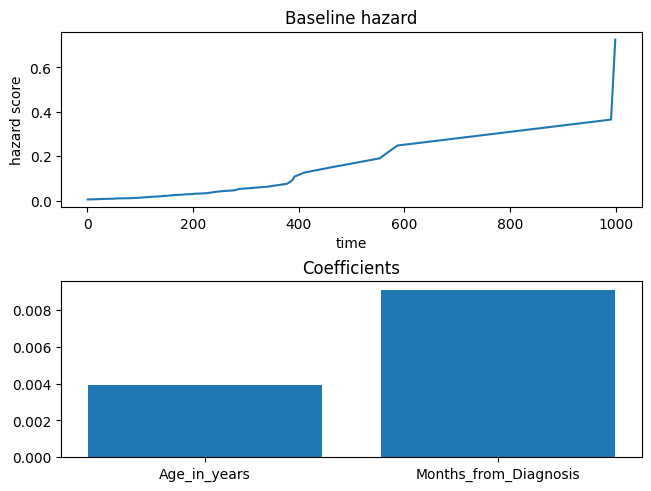

In [13]:
results.plot()

In [14]:
print(results.coefs)
print(results.baseline_hazard.x)
print(results.baseline_hazard.y)

{'Age_in_years': 0.003928637132048607, 'Months_from_Diagnosis': 0.009109284728765488}
[1.0, 2.0, 3.0, 4.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 27.0, 29.0, 30.0, 31.0, 33.0, 35.0, 36.0, 42.0, 43.0, 44.0, 45.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 56.0, 59.0, 61.0, 63.0, 72.0, 73.0, 80.0, 82.0, 83.0, 84.0, 87.0, 90.0, 92.0, 95.0, 97.0, 99.0, 100.0, 103.0, 105.0, 110.0, 111.0, 112.0, 117.0, 118.0, 122.0, 123.0, 126.0, 132.0, 133.0, 139.0, 140.0, 143.0, 144.0, 151.0, 153.0, 156.0, 162.0, 164.0, 177.0, 182.0, 186.0, 200.0, 201.0, 216.0, 228.0, 231.0, 242.0, 250.0, 260.0, 278.0, 283.0, 287.0, 314.0, 340.0, 357.0, 378.0, 384.0, 389.0, 392.0, 411.0, 467.0, 553.0, 587.0, 991.0, 999.0]
[0.005326103650510642, 0.005406326385005742, 0.005454988195933041, 0.005491439606158308, 0.005526904353807684, 0.005655915348016739, 0.0058673036461558, 0.005967908304327523, 0.006015829961280382, 0.006118354717360321, 0.006216931713352177, 0.006321381668957605, 0

## Crossvalidation
It's also possible to run crossvalidation. The parameters are similar to the `fit` method.

In [15]:
crossval_task = verticox_client.cross_validate(feature_columns=feature_columns,
                    outcome_time_column=outcome_time_column,
                    right_censor_column=right_censor_column,
                    feature_nodes=feature_nodes,
                    outcome_node=outcome_node,
                    precision=0.01,
                   )


                    task = self.v6client.task.create(collaboration=1,
                                             organizations=[3],
                                             name=method,
                                             image=test,
                                             description=,
                                             input={'method': 'cross_validate', 'master': True, 'kwargs': {'feature_columns': ['Months_from_Diagnosis', 'Age_in_years'], 'event_times_column': 'event_time', 'event_happened_column': 'event_happened', 'datanode_ids': [1, 2], 'central_node_id': 3, 'convergence_precision': 0.01, 'database': 'default'}},
                                             data_format=json,
                                             database=default
                                             )
            


In [18]:
crossval_result = crossval_task.get_results()

Done!                  Results: {'data': [{'run': {'id': 582, 'link': '/api/run/582', 'methods': ['GET', 'PATCH']}, 'result': '[[0.54, 0.5075757575757576, 0.46893491124260356, 0.48714285714285716, 0.4935483870967742], [{"Age_in_years": 0.002558924490585923, "Months_from_Diagnosis": 0.007024750113487244}, {"Age_in_years": -0.0010991113958880305, "Months_from_Diagnosis": 0.008867615833878517}, {"Age_in_years": 0.008877694606781006, "Months_from_Diagnosis": 0.006313976366072893}, {"Age_in_years": 0.0029411751311272383, "Months_from_Diagnosis": 0.013149532489478588}, {"Age_in_years": 0.0037725227884948254, "Months_from_Diagnosis": 0.007962649688124657}], [[[1.0, 3.0, 4.0, 7.0, 8.0, 10.0, 11.0, 13.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 24.0, 25.0, 27.0, 29.0, 30.0, 31.0, 33.0, 35.0, 36.0, 42.0, 43.0, 45.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 56.0, 59.0, 61.0, 63.0, 72.0, 80.0, 82.0, 83.0, 84.0, 87.0, 90.0, 92.0, 95.0, 97.0, 99.0, 100.0, 103.0, 105.0, 111.0, 112.0, 118.0, 122.0, 123.0, 126.0

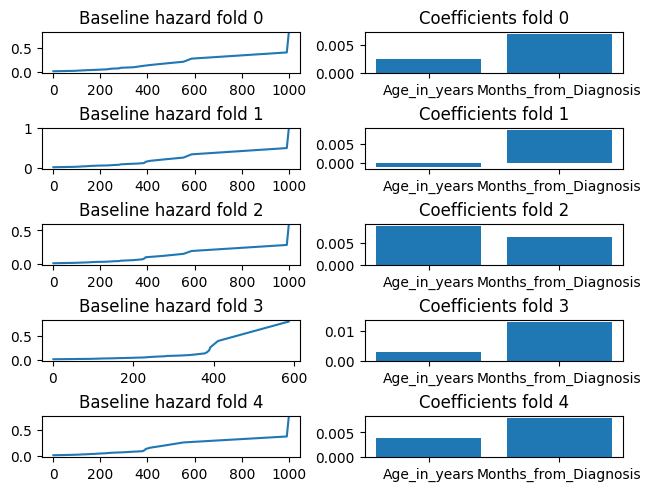

In [19]:
crossval_result.plot()